<a href="https://colab.research.google.com/github/ShadiNrz/Python-Learning/blob/main/NLP-TweetDisaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch
!pip install demoji
# Data Manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# NLP libraries
import string # Library for string operations
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re # Regex library
import demoji
from wordcloud import WordCloud # Word Cloud library

# ploting libraries
import matplotlib.pyplot as plt

# ML/AI libraries
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.python.keras.initializers import RandomNormal




  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title
data = pd.read_csv("/content/gdrive/My Drive//tweets.csv")

# Basic Info
print("Total DataSet: ", len(data))
print("Columns: ", list(data.columns))

X = data[["id", "keyword", "location", "text"]] # Features
y = data[["id","target"]] #Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data", len(y_train))
print("Testing Data", len(y_test))

data.head(3)

Total DataSet:  11370
Columns:  ['id', 'keyword', 'location', 'text', 'target']
Training Data 9096
Testing Data 2274


,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1


In [ ]:
Real_len = data[data['target'] == 1].shape[0]
Not_len = data[data['target'] == 0].shape[0]

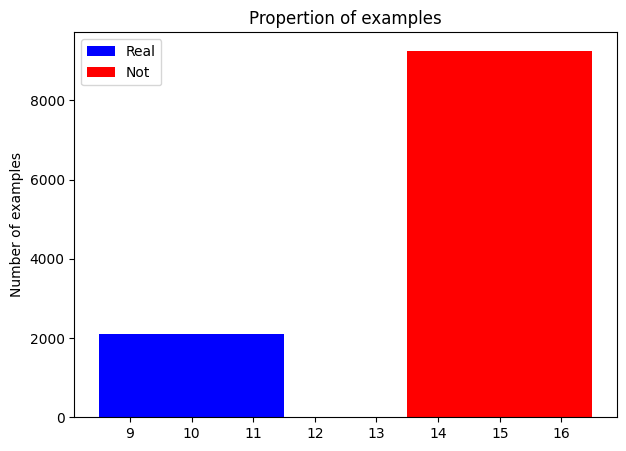

In [ ]:
# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [ ]:
def length(string):
    return len(string)
data['length'] = data['text'].apply(length)

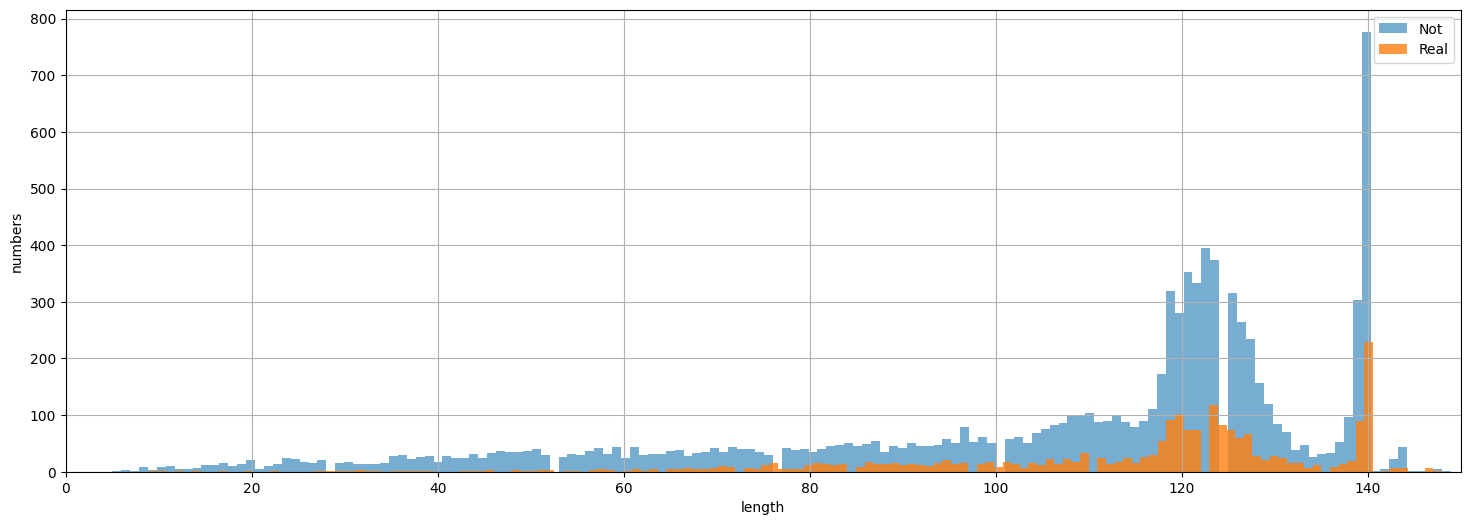

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data[data['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(data[data['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

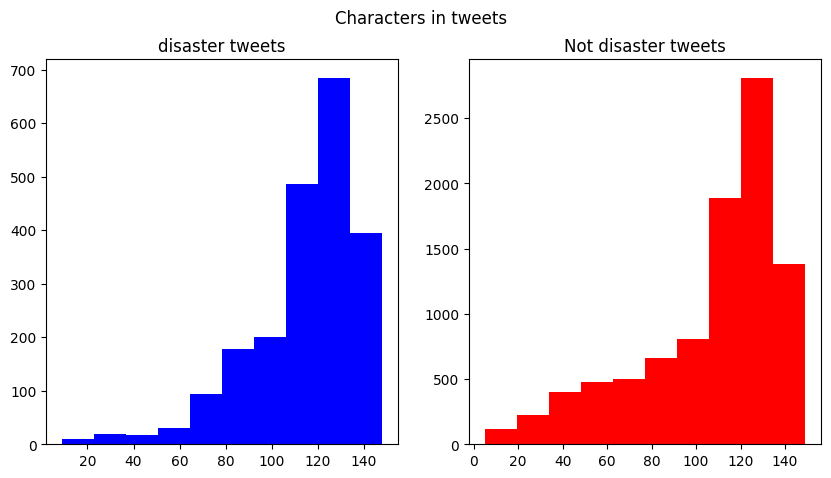

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=data[data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.

Step 1. Remove Url

Step 2. Handle Tags

Step 3. Handle emoji's

Step 4. Remove HTML Tags

Step 5. Remove stopwords

Step 6. Removing Useless Characters



Step 1. Remove Url

In [ ]:
#https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python/11332580
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

In [ ]:
print("Example of text with URL: \n", X_train['text'][3912], end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_Url)
print("Example of text without URL: \n", X_train['text'][3912])

Example of text with URL: 
 why the hell would want to join the Kenyan Cabinet? why would… https://t.co/l91GiZ6Wjr

Example of text without URL: 
 why the hell would want to join the Kenyan Cabinet? why would… 


Step 2. Handle Tags

In [ ]:
def Handle_Tags(string):
    pattern = re.compile(r'[@|#][^\s]+')
    matches = pattern.findall(string)
    tags = [match[1:] for match in matches]
    # Removing tags from main string
    string = re.sub(pattern, '', string)
    # More weightage to tag by adding them 3 times
    return string + ' ' + ' '.join(tags) + ' '+ ' '.join(tags) + ' ' + ' '.join(tags)

In [ ]:
print("Example of text without Handling Tags: \n", X_train['text'][3914],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_Tags)
print("Example of text with Handling Tags: \n", X_train['text'][3914])

Example of text without Handling Tags: 
 #WednesdayWisdom Those who say that they have appeared to destroy all the locos He is worshiping them as full divine Mu…

Example of text with Handling Tags: 
  Those who say that they have appeared to destroy all the locos He is worshiping them as full divine Mu… WednesdayWisdom WednesdayWisdom WednesdayWisdom


Step 3. Handle emoji's

In [ ]:
#http://unicode.org/Public/emoji/12.0/emoji-test.txt
demoji.download_codes()

<ipython-input-13-0dea41d62088>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
def Handle_emoji(string):
    # return demoji.replace_with_desc(string)
    return demoji.replace(string, "")

In [ ]:
# print(X_train['text'][1])
print("Example of text without Handled Emojis: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_emoji)
print("Example of text with Handled Emoji: \n", X_train['text'][17])


Example of text without Handled Emojis: 
 Rengoku sets my heart ablaze😔❤️🔥 P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃

Example of text with Handled Emoji: 
 Rengoku sets my heart ablaze P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃


Step 4. Remove HTML Tags

In [ ]:
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))

In [ ]:
X_train['text'] = X_train['text'].apply(Remove_html)

Step 5. Remove Stopwords and Stemming

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopword = stopwords.words('english')
# def Remove_StopAndStem(string):
#     string_list = string.split()
#     return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

def Remove_StopAndStem(string):
      # Remove punctuation
    string = re.sub(r'[^\w\s]', '', string)

      # Split the input string into individual words
    string_list = string.split()

      # Remove stop words and apply stemming
    processed_words = [stemmer.stem(i.lower()) for i in string_list if i.lower() not in stopword]

      # Join processed words back into a single string
    return ' '.join(processed_words)

In [ ]:
print("Example of text before Removing Stopwords: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_StopAndStem)
print("Example of text after Removing Stopwords and Stemming: \n", X_train['text'][17])

Example of text before Removing Stopwords: 
 Rengoku sets my heart ablaze P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃

Example of text after Removing Stopwords and Stemming: 
 rengoku set heart ablaz ps miss style color c 鬼滅の刃 鬼滅の刃 鬼滅の刃


Step 6. Removing Useless Characters

In [ ]:
def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    #https://www.geeksforgeeks.org/python-remove-unwanted-spaces-from-string/
    return re.sub(' +', ' ', thestring)

In [ ]:
print("Example of text before Removing Useless Character: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_UC)
print("Example of text after Removing Useless Character: \n", X_train['text'][17])

Example of text before Removing Useless Character: 
 rengoku set heart ablaz ps miss style color c 鬼滅の刃 鬼滅の刃 鬼滅の刃

Example of text after Removing Useless Character: 
 rengoku set heart ablaz miss style color 


In [ ]:
def merging_details(data):
        #df = pd.DataFrame(columns=['id', 'Cleaned_data'])
        df_list = []

        #https://www.geeksforgeeks.org/how-to-iterate-over-rows-in-pandas-dataframe/
        for row in data.itertuples():
            df_dict = {}
            # Processing Keyword and location
            keyword = re.sub(r'[^a-zA-Z\s]','', str(row[2]))
            location = re.sub(r'[^a-zA-Z\s]','', str(row[3]))
            keyword = re.sub(r'\b\w{1,2}\b', '', keyword)
            location = re.sub(r'\b\w{1,2}\b', '', location)
            # Already processed data
            text = str(row[4])

            if keyword == 'nan':
                if location == 'nan':
                    prs_data = text
                else:
                    prs_data = location + ' ' + text
            else:
                if location == 'nan':
                    prs_data = keyword + ' ' + text
                else:
                    prs_data = keyword + ' ' + location + ' ' + text

            prs_data = re.sub(' +', ' ', prs_data)

            df_dict['Cleaned_data'] = prs_data

            df_list.append(df_dict)

        return pd.DataFrame(df_list)

In [ ]:
X_train = merging_details(X_train)

In [ ]:
X_train

,Cleaned_data
0,destroy hell would want join kenyan cabinet would
1,flooding citizen unit wreak havoc democraci de...
2,wreckage happi sorrow guess live today tomorro...
3,derailed Pittsburgh rememb cheer derail campai...
4,wrecked Oklahoma City first listen also whip d...
...,...
9091,wreck caus wreck theyr like
9092,explosion Lagos Nigeria let get starboy subscr...
9093,fatalities long day storm survey one team foun...
9094,blaze Kampala Uganda work next one lead govern...


WORDCLOUD

In [1]:
%%time
dict_of_words = {}
for row in  X_train.itertuples():
    for i in row[1].split():
        try:
            dict_of_words[i] += 1
        except:
            dict_of_words[i] = 1

#Initializing  WordCloud
wordcloud = WordCloud(background_color = 'black', width=1000, height=500).generate_from_frequencies(dict_of_words)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

NameError: name 'X_train' is not defined

Final Pre-Processing Data

In [ ]:
# Step 1. Remove Url
X_test['text'] = X_test['text'].apply(Remove_Url)
# Step 2. Handle Tags
X_test['text'] = X_test['text'].apply(Handle_Tags)
# Step 3. Handle emoji's
X_test['text'] = X_test['text'].apply(Handle_emoji)
# Step 4. Remove HTML Tags
X_test['text'] = X_test['text'].apply(Remove_html)
# Step 5. Remove Stopwords and Stemming
X_test['text'] = X_test['text'].apply(Remove_StopAndStem)
# Step 6. Removing Useless Characters
X_test['text'] = X_test['text'].apply(Remove_UC)
# Step7. Merging Other Details
X_test = merging_details(X_test)

In [ ]:
X_test

,Cleaned_data
0,demolished Observation drone mani illeg build ...
1,fatality whos fatal tho
2,sunk London chines state media confirm iranian...
3,windstorm London luck miss windstorm either si...
4,buildingsonfire inferno black friday death bui...
...,...
2269,eyewitness United States plp leader call hypoc...
2270,thunderstorm Pluto cant sleep open window take...
2271,attacked Lagos Nigeria son teenag girl arrest ...
2272,loudbang Michigan USA brother got bathroom hea...


In [ ]:
y_train = y_train['target']
y_test = y_test['target']

In [ ]:
%%time
#smooth_idf=True by default so smoothing is done by defult.
#norm is l2 by default.
#subliner is used False by default.
vectorizer = TfidfVectorizer(min_df = 0.0005,
                             max_features = 100000,
                             tokenizer = lambda x: x.split(),
                             ngram_range = (1,4))


X_train = vectorizer.fit_transform(X_train['Cleaned_data'])
X_test = vectorizer.transform(X_test['Cleaned_data'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 1.51 s, sys: 85.9 ms, total: 1.59 s
Wall time: 1.64 s


In [ ]:
#https://stackoverflow.com/questions/16505670/generating-a-dense-matrix-from-a-sparse-matrix-in-numpy-python
print("Training Points: ", len(X_train.toarray()),"| Training Features:" , len(X_train.toarray()[0]))
print("Testing Points: ", len(X_test.toarray()),"| Testing Features:" , len(X_test.toarray()[0]))
print()
print("Training Points: ", len(y_train))
print("Testing Points: ", len(y_test))

Training Points:  9096 | Training Features: 4457
Testing Points:  2274 | Testing Features: 4457

Training Points:  9096
Testing Points:  2274


Machine Learning

Logistic Regression

In [ ]:
%%time

Model = LogisticRegression(C=1,penalty='l2')

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8865435356200527
Macro precision_recall_fscore_support
(0.8870454155587957, 0.6941701358634267, 0.7428003275647107, None)
Micro precision_recall_fscore_support
(0.8865435356200527, 0.8865435356200527, 0.8865435356200527, None)
Weighted precision_recall_fscore_support
(0.8866576230305282, 0.8865435356200527, 0.8681105830576619, None)
CPU times: user 119 ms, sys: 980 µs, total: 120 ms
Wall time: 129 ms


Gaussian Naive Bayes

In [ ]:
%%time
Model = GaussianNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.6517150395778364
Macro precision_recall_fscore_support
(0.6215937693225325, 0.7094265337076839, 0.5951495489792689, None)
Micro precision_recall_fscore_support
(0.6517150395778364, 0.6517150395778364, 0.6517150395778364, None)
Weighted precision_recall_fscore_support
(0.8263631386728095, 0.6517150395778364, 0.6937731455287712, None)
CPU times: user 693 ms, sys: 1.3 s, total: 1.99 s
Wall time: 3.06 s


Support Vector Machines (SVM)

In [ ]:
%%time
Model = svm.SVC(kernel='linear')
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8931398416886543
Macro precision_recall_fscore_support
(0.8575763671658905, 0.7390155549101236, 0.7793543889183261, None)
Micro precision_recall_fscore_support
(0.8931398416886543, 0.8931398416886543, 0.8931398416886543, None)
Weighted precision_recall_fscore_support
(0.8871195674140608, 0.8931398416886543, 0.8826183454435107, None)
CPU times: user 6.27 s, sys: 143 ms, total: 6.41 s
Wall time: 9.15 s


Random Forest

In [ ]:
%%time
Model = RandomForestClassifier(random_state=0)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8891820580474934
Macro precision_recall_fscore_support
(0.8683762458471761, 0.7146989059928357, 0.7601157376011575, None)
Micro precision_recall_fscore_support
(0.8891820580474934, 0.8891820580474934, 0.8891820580474934, None)
Weighted precision_recall_fscore_support
(0.8850074290623166, 0.8891820580474934, 0.8747897705157078, None)
CPU times: user 8.94 s, sys: 12.5 ms, total: 8.96 s
Wall time: 9.06 s


BERT

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
X = data["text"]  # Ensure X is the text data
y = data["target"]  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the data
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=64, return_tensors='pt')
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=64, return_tensors='pt')

# Define custom dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train.tolist())
test_dataset = CustomDataset(test_encodings, y_test.tolist())

In [ ]:
# Define the custom model
class CustomDistilBERTModel(nn.Module):
    def __init__(self, bert_model, input_dim, hidden_layer_1, hidden_layer_2, output_dim):
        super(CustomDistilBERTModel, self).__init__()
        self.bert = bert_model
        self.fc1 = nn.Linear(input_dim, hidden_layer_1)
        self.fc2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.fc3 = nn.Linear(hidden_layer_2, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[0][:, 0, :]  # Use the first token (CLS token)
        x = self.relu(self.fc1(pooled_output))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

# Load pretrained DistilBERT model
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Define input and output dimensions
input_dim = 768  # DistilBERT's hidden size
hidden_layer_1 = 512  # Reduced size for efficiency
hidden_layer_2 = 256   # Reduced size for efficiency
output_dim = 1         # Binary classification

# Instantiate the model
model = CustomDistilBERTModel(bert_model, input_dim, hidden_layer_1, hidden_layer_2, output_dim)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Training parameters
batch_size = 4
nb_epoch = 3
learning_rate = 1e-5

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Training function
def train(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels'].float().unsqueeze(1)  # Ensure labels are the correct shape
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()  # Compute gradients
        optimizer.step()  # Update model parameters
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Evaluation function
def evaluate(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels'].float().unsqueeze(1)
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            predictions.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return total_loss / len(test_loader), predictions, true_labels

# Training loop
for epoch in range(nb_epoch):
    train_loss = train(model, train_loader, criterion, optimizer)
    test_loss, predictions, true_labels = evaluate(model, test_loader, criterion)
    predictions = [1 if p > 0.5 else 0 for p in predictions]  # Binarize predictions
    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    print(f'Epoch {epoch + 1}/{nb_epoch}')
    print(f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Final evaluation
test_loss, predictions, true_labels = evaluate(model, test_loader, criterion)
predictions = [1 if p > 0.5 else 0 for p in predictions]
accuracy = accuracy_score(true_labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
print(f'Final Evaluation:')
print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Epoch 1/3
Train Loss: 0.2820, Test Loss: 0.2137
Accuracy: 0.9173, Precision: 0.9141, Recall: 0.9173, F1 Score: 0.9148
Epoch 2/3
Train Loss: 0.1640, Test Loss: 0.2193
Accuracy: 0.9283, Precision: 0.9258, Recall: 0.9283, F1 Score: 0.9254
